### Формулюємо задачу лінійного програмування
> максимізувати прибуток від продажу предметів на аукціоні у грі

> ми знаємо вартість предметів та за скільки їх можна продати

> ми можемо купити лімітова число предметів через обмеження вмістимості сумок

> у нас є лімітова кількість золота на покупку предметів

### Задаємо початкові значення
У нас зараз є 100 золотих монет та сумна на 20 слотів.


|Предмет|Ціна купівлі|Ціна продажу|Скільки слотів займає|
|---|---|---|---|
|Міфрил (x)|4|5|2|
|Опал (y)|10|12|1|

$$
\begin{aligned}
\max_{міфрил,опал} && (ЦінаПродажу-ЦінаКупівлі)*КількістьПредметів \\
\text{за умов} && КількістьПредметів*ЦінаКіпівні <= 100 золотих \\
\ && КількістьПредметів*КількістьСлотів <= 20 \\
\ && КількістьПредметів>=0\
\end{aligned}
$$

In [1]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

### Приблизно знаходимо графічний розвязок

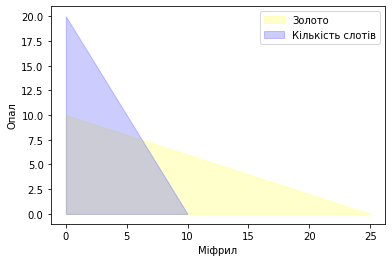

In [12]:
# x*4 + y*10 <= 100 золотих
# x*2 + y*1 <= 20  слотів
x = np.arange(0, 50, step=0.01)
y1 = (100 - x*4)/10
y2 = 20 - x*2
plt.fill_between(x, y1, 0, where=y1>0, alpha=0.2, color='yellow', label='Золото')
plt.fill_between(x, y2, 0, where=y2>0, alpha=0.2, color='blue', label='Кількість слотів')
plt.xlabel("Міфрил")
plt.ylabel("Опал")
plt.legend()

In [13]:
# Записуємо коефіцієнти цільової функції
c = np.array([(5-4), (12-10)])

# Записуємо матрицю умов (з коефіцієнтів рівнянь)
A = np.array([
    [4, 10],
    [2, 1]
])

# Записуємо матрицю розвязків
b = np.array([100, 20])

# Записуємо вектор обмежень області значень (від 0, до безкінечності)
bnd = [(0, None), (0, None)]

# Знаходимо розвязки задачі
res = linprog(-c, A_ub=A, b_ub=b, bounds=bnd)

x1, x2 = res.x
profit = -res.fun

print(f"Кількість Міфрилу: {x1}")
print(f"Кількість Опалу: {x2}")
print(f"Загальний прибуток: {profit} золотих")

# Домашнє завдання - зобразити точку розязку на графіку

Кількість Міфрилу: 6.25
Кількість Опалу: 7.5
Загальний прибуток: 21.25 золотих
